## Gaussian Kernel Density Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import *

def func(a): # make sample array 
    if a < 1/8:
        return sqrt(8 * a)
    if a < 1/4:
        return 2-sqrt(2-8*a)
    if a < 1/2:
        return 4 * a + 1
    if a < 3/4:
        return sqrt(4 * a - 2) + 3
    else:
        return 5 - sqrt(4 - 4 * a)
    
class KDE:
    def __init__(self, X, h):
        self.sample = X
        self.h = h
        self.p = np.vectorize(self.p_)
    
    def K(self, x):
        return np.exp(-x**2/2)/sqrt(2*pi)

    def p_(self, x):
        x_ = (x - self.sample) / self.h
        return self.K(x_).sum() / (n * self.h)

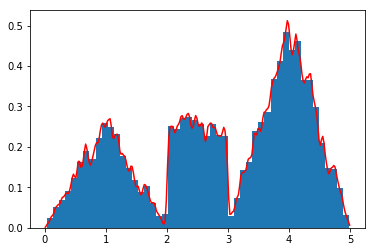

In [2]:
n = 10000 #num of sample points
arr = np.random.rand(n)
arr = np.vectorize(func)(arr)
plt.hist(arr, 50, density=True)

h = 0.02
X = np.arange(0 + h/2, 5, h)

kde = KDE(arr, h)
plt.plot(X, kde.p(X), 'r')

In [3]:
#Cross-validate
cut = 10

w = len(arr)//cut
for h in [0.005, 0.01, 0.02, 0.05, 0.1, 0.5]:
    buf = []
    for i in range(cut):
        kde = KDE(np.delete(arr, range(i*w, (i+1)*w)), h)
        buf.append(np.log(kde.p(arr[i*w:(i+1)*w])).mean())

    print('h =', h, ':', round(np.array(buf).mean(), 3))

h = 0.005 : -1.541
h = 0.01 : -1.533
h = 0.02 : -1.53
h = 0.05 : -1.532
h = 0.1 : -1.54
h = 0.5 : -1.66
